In [4]:
%pip install torch torchvision torchaudio
%pip install ultralytics


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 6.25M/6.25M [00:00<00:00, 23.0MB/s]



0: 384x640 1 bowl, 55.2ms
Speed: 2.9ms preprocess, 55.2ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 1/20

0: 384x640 1 cup, 1 bowl, 42.8ms
Speed: 3.0ms preprocess, 42.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 2/20

0: 384x640 1 bowl, 53.2ms
Speed: 1.6ms preprocess, 53.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 3/20

0: 384x640 1 cup, 1 bowl, 80.4ms
Speed: 2.7ms preprocess, 80.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 4/20

0: 384x640 1 bowl, 62.6ms
Speed: 1.7ms preprocess, 62.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 5/20

0: 384x640 1 bowl, 79.3ms
Speed: 2.2ms preprocess, 79.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 6/20

0: 384x640 1 bowl, 36.1ms
Speed: 1.7ms preprocess, 36.1ms inference, 4.9ms postprocess per image at shape (1, 3, 38

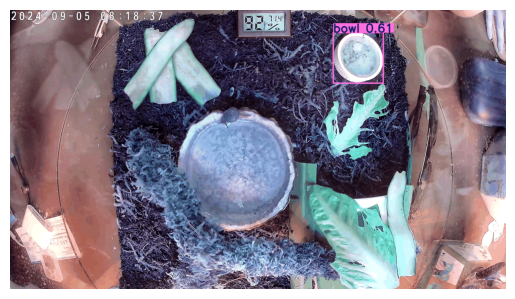

In [2]:
import imageio
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Extract frames from the GIF
gif_path = 'snail_tracking_full_fast.gif'
frames = imageio.mimread(gif_path)

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Load your trained YOLO model, or use a pre-trained one

# Step 2: Run object detection on each frame
detected_frames = []
for i, frame in enumerate(frames):
    # Convert the frame to OpenCV format (BGR)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Perform object detection
    results = model.predict(frame)

    # Annotate the frame with detected objects
    annotated_frame = results[0].plot()
    
    # Convert back to RGB for imageio
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    detected_frames.append(annotated_frame_rgb)

    print(f"Processed frame {i+1}/{len(frames)}")

# Step 3: Save the annotated frames as a new GIF
output_gif_path = 'snail_detection_output.gif'
imageio.mimsave(output_gif_path, detected_frames, duration=1)

print(f"Saved output GIF to {output_gif_path}")

# Step 4: Display one of the detected frames
plt.imshow(detected_frames[0])
plt.axis('off')
plt.show()


In [6]:
import imageio
import os

# Load the GIF
gif_path = 'snail_tracking_full_fast.gif'
frames = imageio.mimread(gif_path)

# Create a directory to save extracted frames
output_dir = 'extracted_frames'
os.makedirs(output_dir, exist_ok=True)

# Save each frame as a separate image
for i, frame in enumerate(frames):
    output_path = os.path.join(output_dir, f'frame_{i+1:02d}.png')
    imageio.imwrite(output_path, frame)
    print(f"Saved {output_path}")

print("All frames have been extracted and saved.")


Saved extracted_frames/frame_01.png
Saved extracted_frames/frame_02.png
Saved extracted_frames/frame_03.png
Saved extracted_frames/frame_04.png
Saved extracted_frames/frame_05.png
Saved extracted_frames/frame_06.png
Saved extracted_frames/frame_07.png
Saved extracted_frames/frame_08.png
Saved extracted_frames/frame_09.png
Saved extracted_frames/frame_10.png
Saved extracted_frames/frame_11.png
Saved extracted_frames/frame_12.png
Saved extracted_frames/frame_13.png
Saved extracted_frames/frame_14.png
Saved extracted_frames/frame_15.png
Saved extracted_frames/frame_16.png
Saved extracted_frames/frame_17.png
Saved extracted_frames/frame_18.png
Saved extracted_frames/frame_19.png
Saved extracted_frames/frame_20.png
All frames have been extracted and saved.


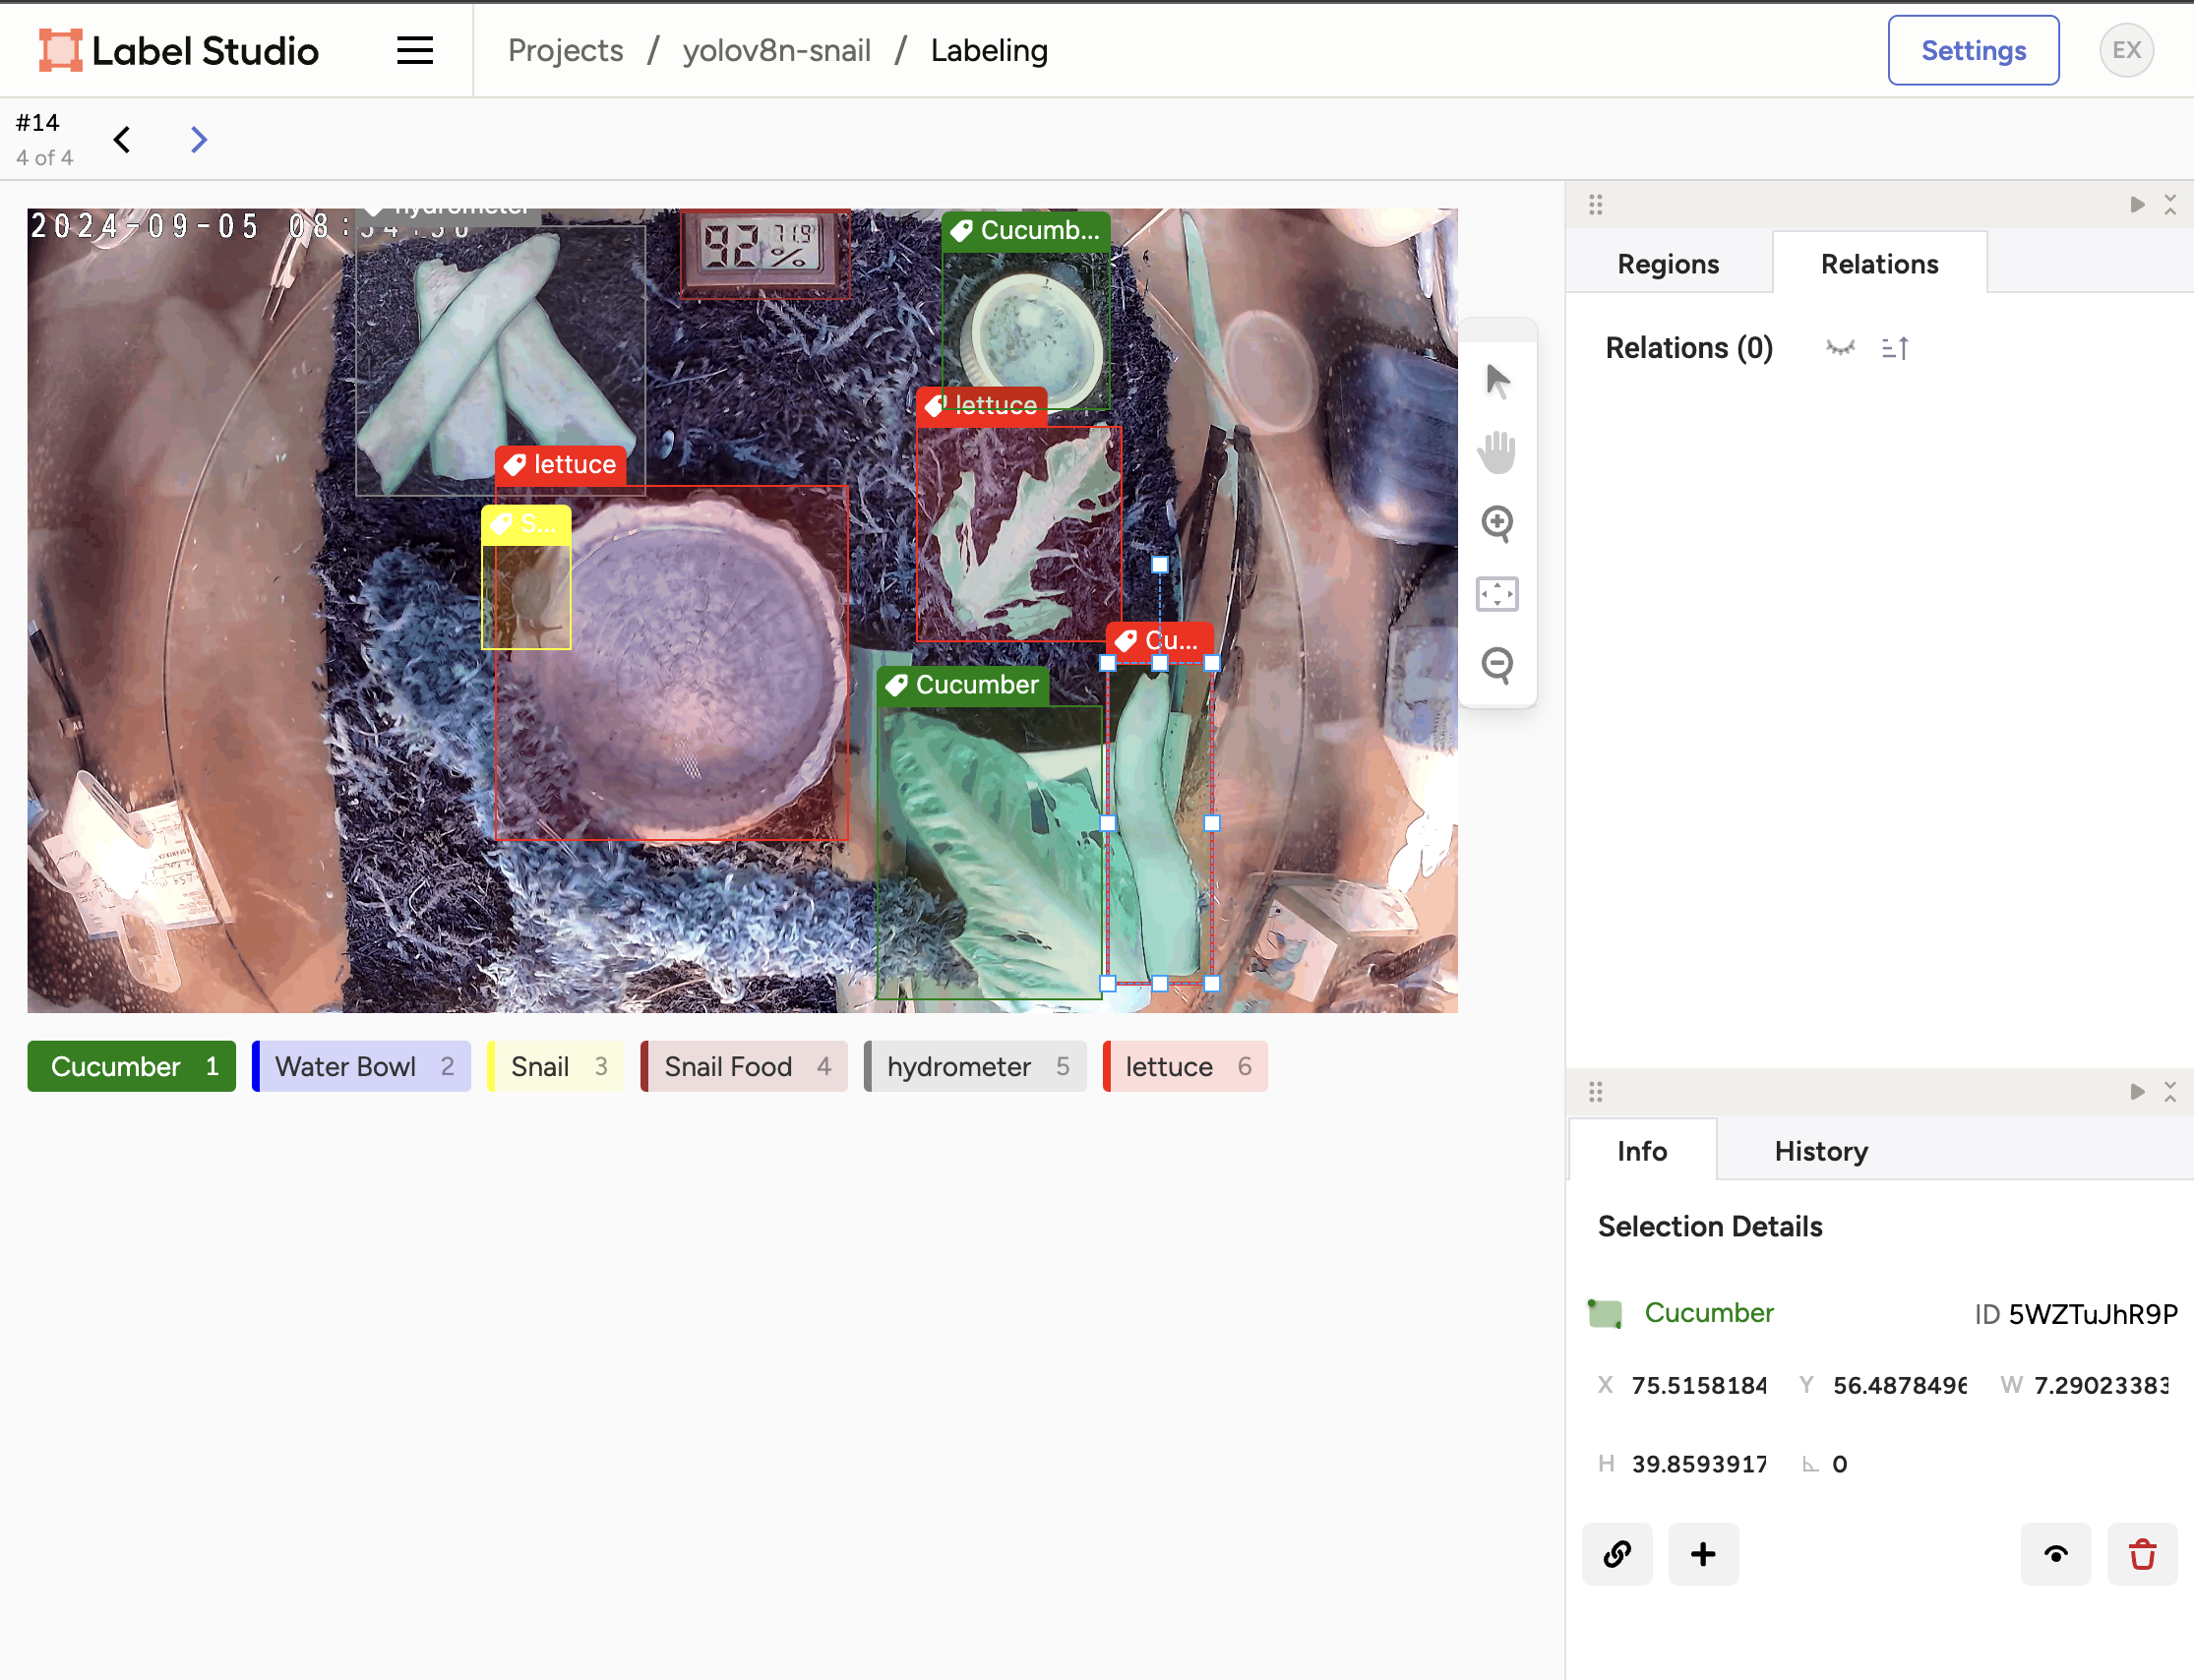

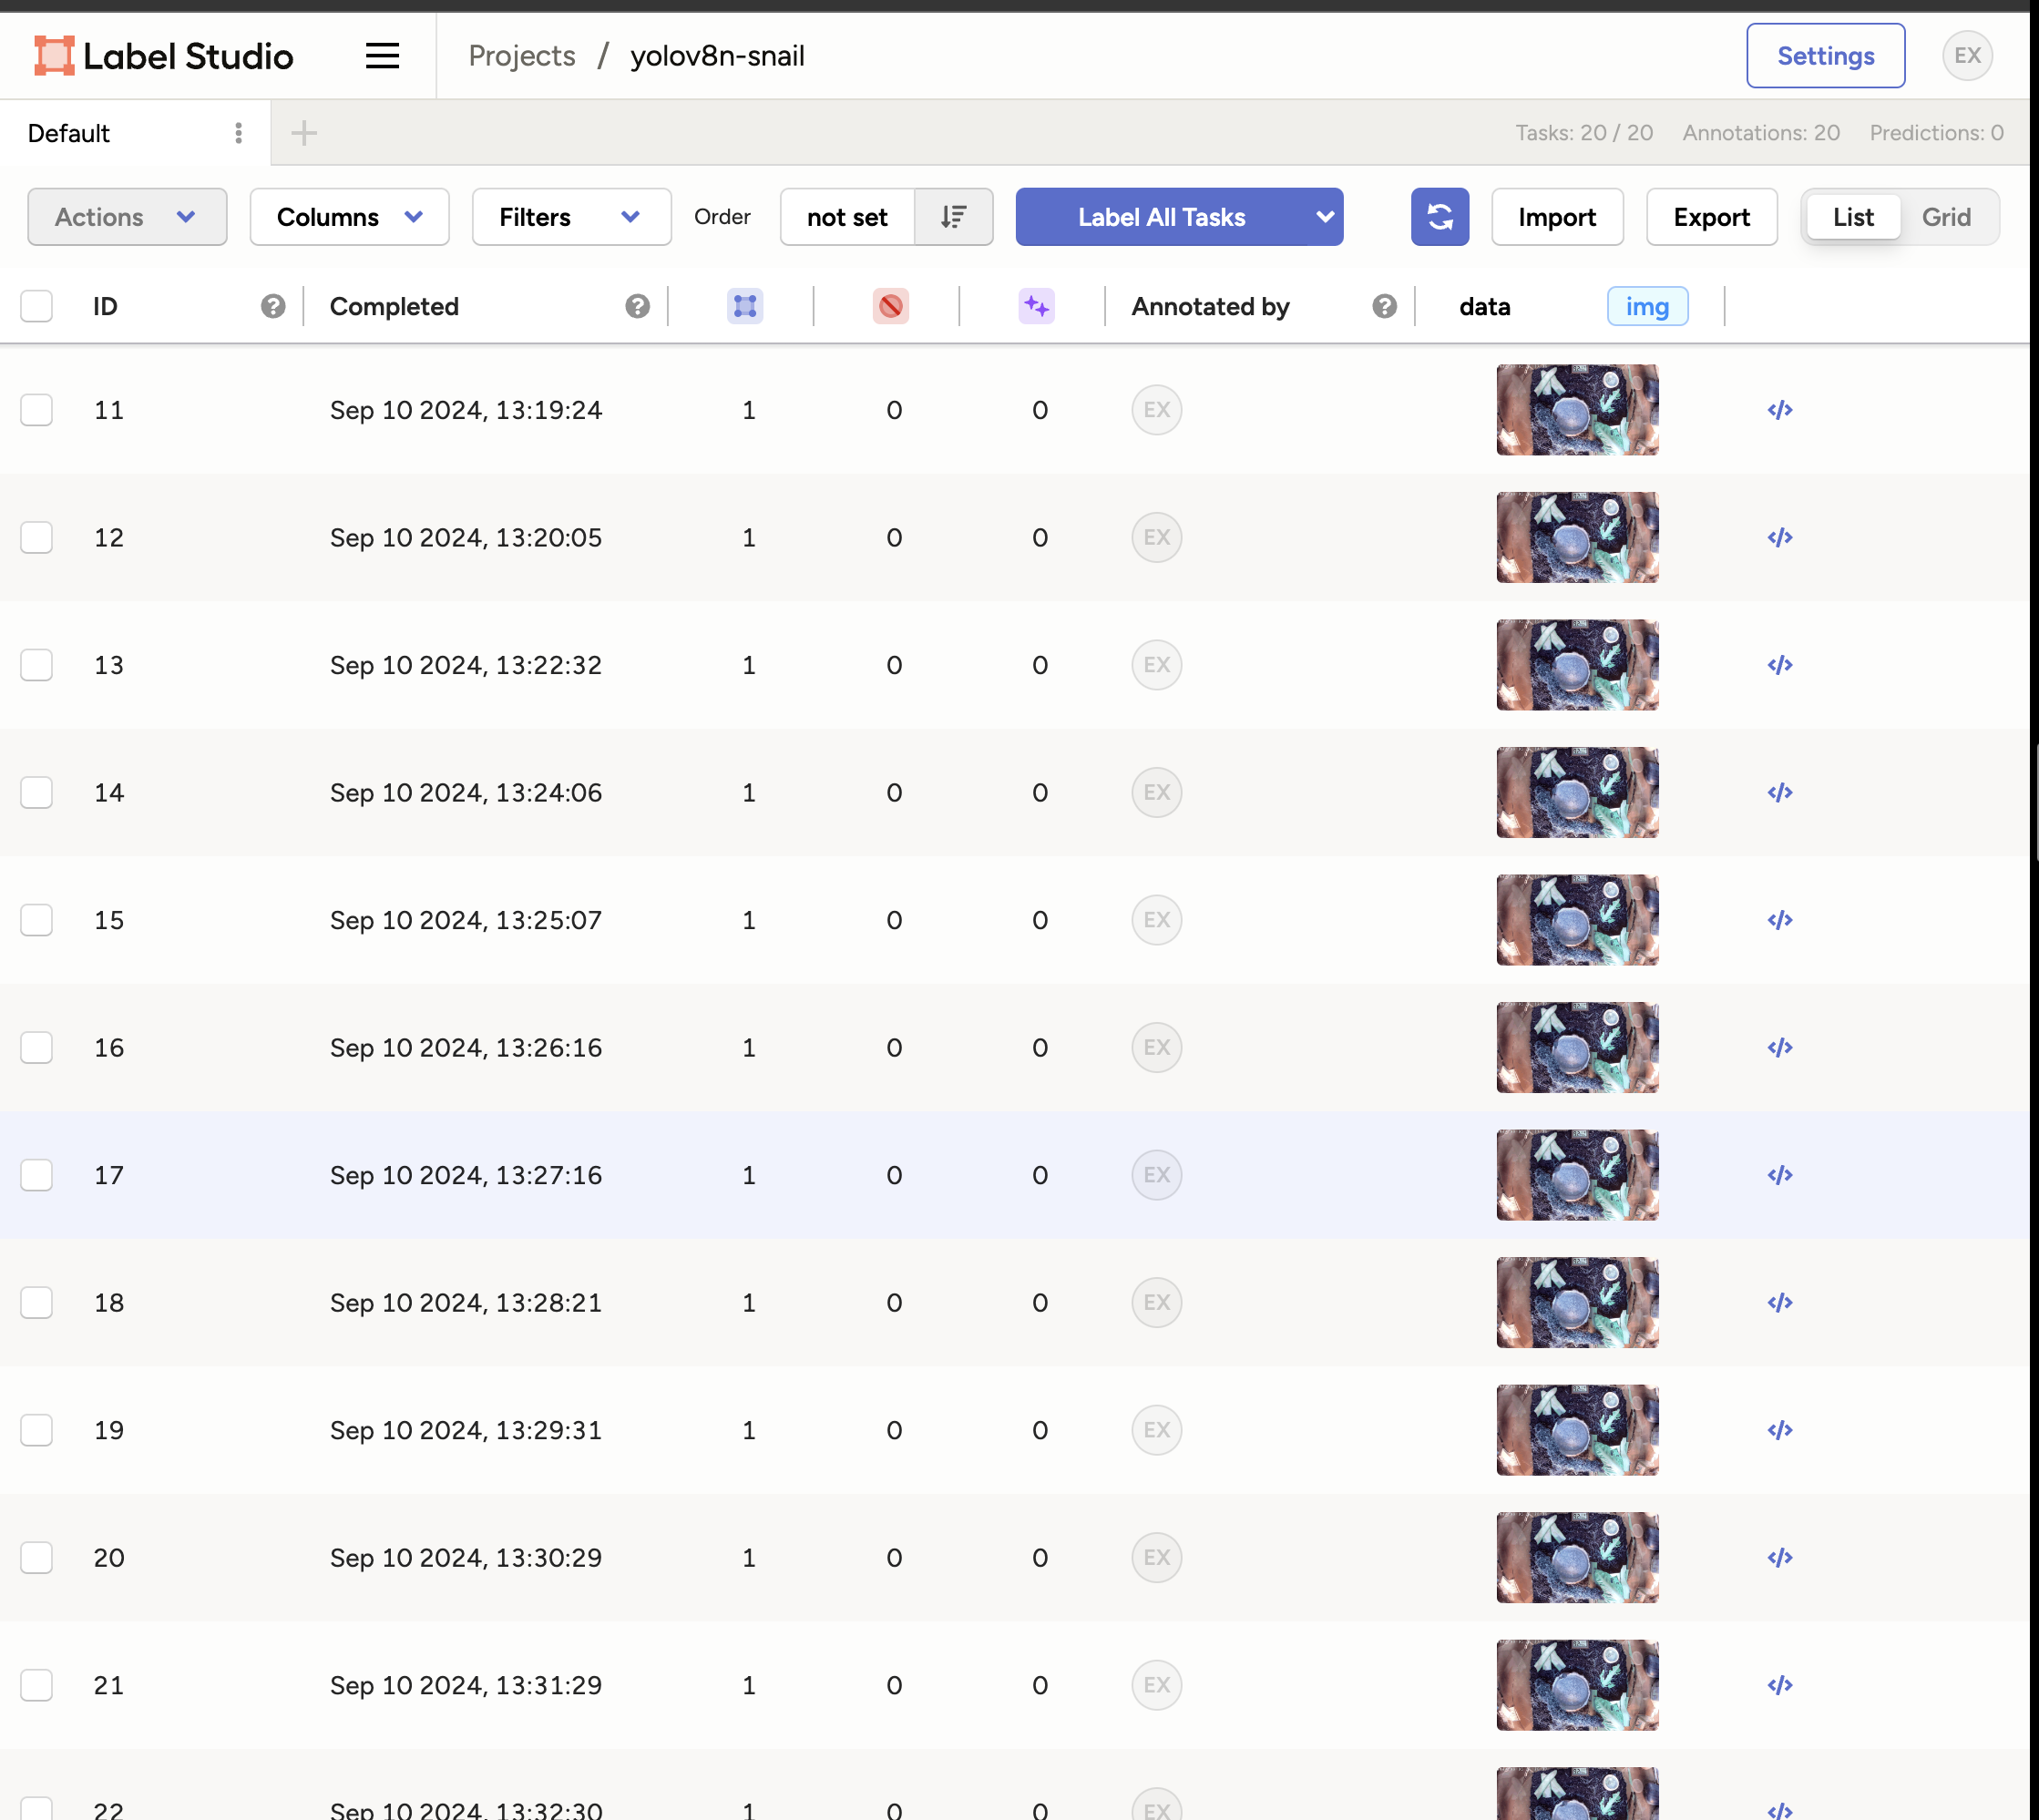




In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_path = 'snail-data'
images_path = os.path.join(base_path, 'images')
labels_path = os.path.join(base_path, 'labels')

train_images_path = os.path.join(base_path, 'train/images')
val_images_path = os.path.join(base_path, 'val/images')
train_labels_path = os.path.join(base_path, 'train/labels')
val_labels_path = os.path.join(base_path, 'val/labels')

# Create directories
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Get list of images
images = [f for f in os.listdir(images_path) if f.endswith('.png')]

# Split the data
train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

# Move files to train and val folders
for img in train_images:
    shutil.move(os.path.join(images_path, img), train_images_path)
    txt_file = img.replace('.png', '.txt')
    shutil.move(os.path.join(labels_path, txt_file), train_labels_path)

for img in val_images:
    shutil.move(os.path.join(images_path, img), val_images_path)
    txt_file = img.replace('.png', '.txt')
    shutil.move(os.path.join(labels_path, txt_file), val_labels_path)


In [8]:
# Run train.py from within Jupyter Notebook
!python train.py


Ultralytics YOLOv8.2.91 🚀 Python-3.12.5 torch-2.4.1 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=cpu, workers=8, project=None, name=snail-detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=


0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 51.7ms
Speed: 3.4ms preprocess, 51.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 1/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 96.8ms
Speed: 1.9ms preprocess, 96.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 2/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 44.7ms
Speed: 1.8ms preprocess, 44.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 3/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 4/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 43.8ms
Speed: 1.7ms preprocess, 43.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 5/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 39.5ms
Speed: 1.3ms preprocess, 39.5ms inference, 0.3ms postprocess per image at 

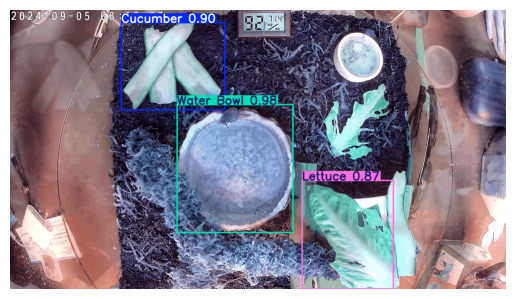

In [9]:
import imageio
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Extract frames from the GIF
gif_path = 'snail_tracking_full_fast.gif'
frames = imageio.mimread(gif_path)

# Load the YOLO model
model = YOLO('/opt/homebrew/runs/detect/snail-detection3/weights/best.pt')  # Replace with the path to your trained YOLO model

# Step 2: Run object detection on each frame
detected_frames = []
for i, frame in enumerate(frames):
    # Convert the frame to OpenCV format (BGR)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Perform object detection
    results = model.predict(source=frame, show=False)  # Disable auto display

    # Annotate the frame with detected objects
    annotated_frame = results[0].plot()
    
    # Convert back to RGB for imageio
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    detected_frames.append(annotated_frame_rgb)

    print(f"Processed frame {i+1}/{len(frames)}")

# Step 3: Save the annotated frames as a new GIF
output_gif_path = 'snail_detection_output.gif'
imageio.mimsave(output_gif_path, detected_frames, duration=1)

print(f"Saved output GIF to {output_gif_path}")

# Step 4: Display one of the detected frames
plt.imshow(detected_frames[0])
plt.axis('off')
plt.show()



0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 94.7ms
Speed: 2.6ms preprocess, 94.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 1/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 44.3ms
Speed: 2.4ms preprocess, 44.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 2/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 49.4ms
Speed: 2.0ms preprocess, 49.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 3/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 41.7ms
Speed: 1.5ms preprocess, 41.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 4/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 46.1ms
Speed: 2.3ms preprocess, 46.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 5/20

0: 384x640 1 Cucumber, 1 Water Bowl, 1 Lettuce, 46.8ms
Speed: 1.9ms preprocess, 46.8ms inference, 0.4ms postprocess per image at 

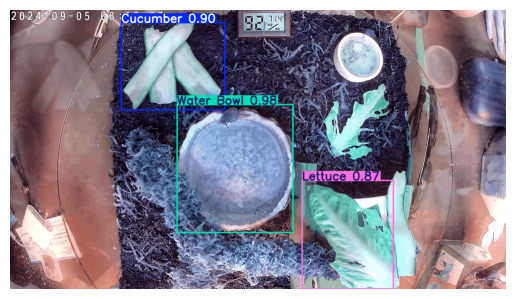

In [10]:
import imageio
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Extract frames from the GIF
gif_path = 'snail_tracking_full_fast.gif'
frames = imageio.mimread(gif_path)

# Load the YOLO model
model = YOLO('/opt/homebrew/runs/detect/snail-detection3/weights/best.pt')  # Replace with the path to your trained YOLO model

# Step 2: Run object detection on each frame
detected_frames = []
for i, frame in enumerate(frames):
    # Convert the frame to OpenCV format (BGR)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Perform object detection
    results = model.predict(frame, show=False)  # Disable auto display

    # Annotate the frame with detected objects
    annotated_frame = results[0].plot()
    
    # Convert back to RGB for imageio
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    detected_frames.append(annotated_frame_rgb)

    print(f"Processed frame {i+1}/{len(frames)}")

# Step 3: Save the annotated frames as a new GIF
output_gif_path = 'snail_detection_output.gif'
imageio.mimsave(output_gif_path, detected_frames, duration=1)

print(f"Saved output GIF to {output_gif_path}")

# Step 4: Display one of the detected frames
plt.imshow(detected_frames[0])
plt.axis('off')
plt.show()


In [6]:
%pip uninstall numpy scipy
%pip install numpy scipy

%pip uninstall scikit-learn
%pip install scikit-learn



Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/bin/f2py
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/numpy-1.26.4.dist-info/*
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/numpy/.dylibs/libgcc_s.1.1.dylib
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/numpy/.dylibs/libgfortran.5.dylib
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/numpy/.dylibs/libopenblas64_.0.dylib
    /Users/alexsciuto/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/snail-tracker/env/lib/python3.12/site-packages/numpy/.dylibs/libquadmath.0.dylib
    /Users